# Task 1

In [153]:
import numpy as np 
from scipy.integrate import odeint
from math import *
from matplotlib.pyplot import *

def u1(time):
  if time < 5:
    return 1
  else:
    return -1

def u2(time):
  if time < 5:
    return 10  
  else:
    return -10

In [154]:
def sys_ode(x, t):
    v = x
    dv = -np.abs(v)*v + u2(t) ; # change u2 to u1 or vise versa

    return dv

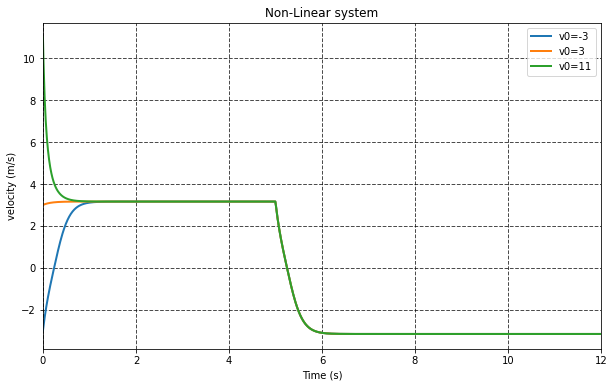

In [155]:
t0 = 0 
tf = 12 
N = int(1E3) 
t = np.linspace(t0, tf, N) 
v0 = [-3,3,11] # Initial velocity
figure(figsize=(10, 6))

for v_0 in v0:
  v = odeint(sys_ode, v_0, t)
  plot(t, v, linewidth=2.0) 

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
title("Non-Linear system")
grid(True)
xlim([t0, tf])
ylabel(r'velocity (m/s)')
xlabel(r'Time (s)')
legend(["v0=-3","v0=3","v0=11"])
show() 

In [156]:
def sys_ode(x, t):
    v = x

    dv = -v + u2(t) ;
    return dv

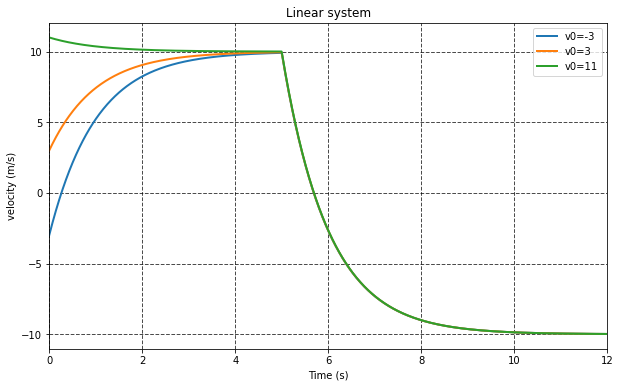

In [157]:
t0 = 0 
tf = 12 
N = int(1E3) 
t = np.linspace(t0, tf, N)
v0 =  [-3,3,11] # Initial velocity
figure(figsize=(10, 6))
for v_0 in v0:
  v = odeint(sys_ode, v_0, t)
  plot(t, v, linewidth=2.0)

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
title("Linear system")
grid(True)
xlim([t0, tf])
ylabel(r'velocity (m/s)')
xlabel(r'Time (s)')
legend(["v0=-3","v0=3","v0=11"])
show()

# Task 2


In [158]:
# from initial points x0 = −1.5, −1, −0.5, 0, 0.5, 1, 1.5.
def sys_ode(x, t):
    dx = x - x**3 ;
    return dx

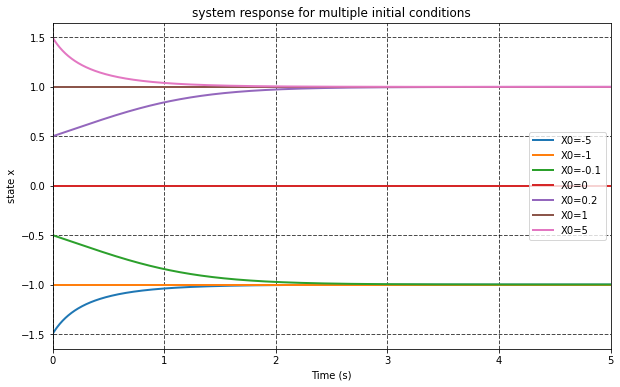

In [159]:
t0 = 0 
tf = 5 
N = int(1E3) 
t = np.linspace(t0, tf, N) 
x0 = [ -1.5, -1, -0.5, 0, 0.5, 1, 1.5] # Initial condition
figure(figsize=(10, 6))
for x in x0:
  x = odeint(sys_ode, x0, t) 

plot(t, x, linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
title("system response for multiple initial conditions")
grid(True)
xlim([t0, tf])
ylabel(r'state x')
xlabel(r'Time (s)')
legend(["X0=-5","X0=-1","X0=-0.1", "X0=0", "X0=0.2", "X0=1", "X0=5"])
show()

# Task 3


In [160]:
def sys_ode(x, t, system_params):
    alpha = system_params['alpha']
    beta = system_params['beta']
    gamma = system_params['gamma']
    x1, x2 = x[0], x[1]

    dx1 = alpha*x1 - beta*x1*x2 
    dx2 = gamma*x1*x2 - gamma*x2

    return dx1, dx2

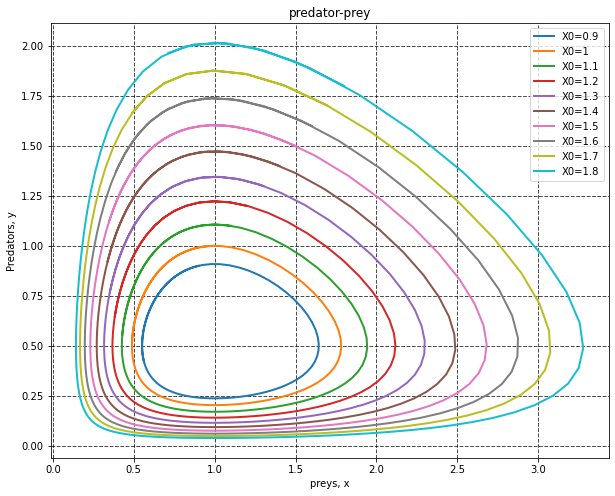

In [161]:
import numpy as np
t0 = 0 
tf = 10 
N = int(1E2) 
t = np.linspace(t0, tf, N) 
x0 = [[0.9, 0.9],[1, 1], [1.1, 1.1], [1.2, 1.2], [1.3, 1.3],[1.4, 1.4], [1.5, 1.5], [1.6, 1.6],[1.7, 1.7], [1.8, 1.8]] # Initial condition
system_params = {'alpha': 2/3,
                 'beta': 4/3,
                 'gamma': 1} 
figure(figsize=(10, 8))
for x in x0:
    x_sol = odeint(sys_ode, x , t, args=(system_params,) ) 
    x, y = x_sol[:,0], x_sol[:,1] 
    plot(x, y, linewidth=2.0)

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
title("predator-prey")
grid(True)
ylabel(r'Predators, y')
xlabel(r'preys, x')
legend(["X0=0.9","X0=1","X0=1.1", "X0=1.2", "X0=1.3", "X0=1.4", "X0=1.5","X0=1.6","X0=1.7","X0=1.8" ])
show()

# Task 4


In [162]:
def sys_ode(x, t, system_params):
    g = system_params['g']
    m1 = system_params['m1']
    m2 = system_params['m2']
    L1 = system_params['L1']
    L2 = system_params['L2']
    x1, x2, dx1, dx2 = x[0], x[1], x[2], x[3]

    ddx1 = (-(2*m1+m2)*g*np.sin(x1)) - (m2*g*np.sin(x1 - 2*x2)) - (2*np.sin(x1 - x2)*m2* (dx2**2 *L2 + dx1**2 *L1* np.cos(x1 - x2))) /(L1*(2*m1 + m2 - m2* np.cos(2*x1 - 2*x2)))

    ddx2 = 2*np.sin(x1 - x2)* (dx1**2*L1*(m1 + m2) + g*(m1 + m2)*np.cos(x1) + dx2**2*L2*m2*np.cos(x1 - x2))/ (L2*(2*m1 + m2 - m2*np.cos(2*x1 - 2*x2)))

    return  dx1, dx2, ddx1, ddx2

In [163]:
from math import sqrt
t0 = 0 
tf = 20
N = int(1000)
t = np.linspace(t0, tf, N) 
x0 = [[(np.pi/2)+0.02, (np.pi/2)+0.02, 0, 0],[np.pi/2, np.pi/2, 0, 0], [(np.pi/2)-0.02, (np.pi/2)-0.02, 0, 0]] # Initial condition
system_params = {'g': 9.81,
                 'm1': 2,
                 'm2': 1,
                 'L1': 3,
                 'L2': 3} 
L1 = 3
L2 = 3

x_sol = odeint(sys_ode, x0[1] , t, args=(system_params,) ) 

theta1, theta2,dtheta1, dtheta2 = x_sol[:,0], x_sol[:,1], x_sol[:,2], x_sol[:,3]
Posx1, Posx2, Posy1, Posy2 = [],[], [],[]
for i in range(len(theta1)):
    x1 = L1*np.sin(theta1[i])
    y1 = L1*np.cos(theta1[i])
    x2 = x1 + L2*np.sin(theta2[i])
    y2 = y1 + L2*np.cos(theta2[i])
    Posx1.append(-x1)
    Posx2.append(-x2)
    Posy1.append(-y1)
    Posy2.append(-y2)

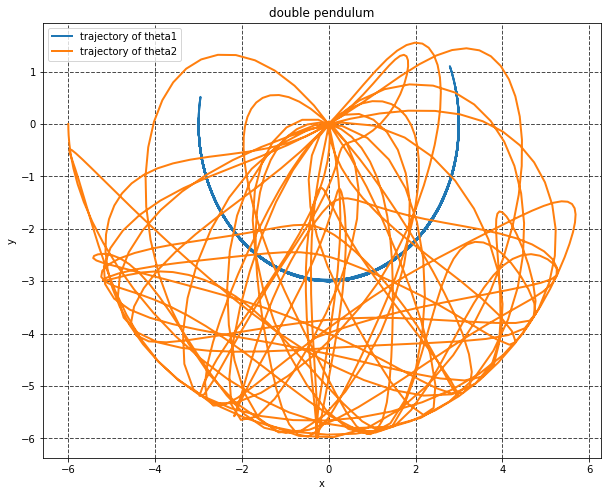

In [164]:
figure(figsize=(10, 8))
plot(Posx1, Posy1, linewidth=2.0, label='theta1')
plot(Posx2, Posy2, linewidth=2.0, label='theta2')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
title("double pendulum")
grid(True)
ylabel(r'y')
xlabel(r'x')
legend(["trajectory of theta1","trajectory of theta2"])
show()